In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
cmap = cmaps.WhiteBlueGreenYellowRed

In [12]:
def draw_thailand(data, vmin=0, vmax=3):
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-90, -70, 5, 25)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(data,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     vmin=vmin, vmax=vmax,
                     cmap='WhiteBlueGreenYellowRed'
                    )
    cbar = fig.colorbar(mat,
                        ax=ax,
                        orientation='horizontal'
                       )
    plt.show()

In [13]:
def load_7month(
                filename='may_first_start_2017_2022_7months_51ensembles',
                ):
    dr = '/work/kajiyama/data/ECMWF_forecast/'
    path = dr + filename + '.npy'
    monthly = np.load(path)
    print(f"monthly: {monthly.shape}")
    return monthly

In [14]:
def extract_thailand(worldmap):
    lt20 = int(89.5 - 19.5)
    ln100 = int(99.5 - 0.5)
    lats = [lt20 -5, lt20 + 15]
    lons = [ln100 - 10, ln100 + 10]
    
    thailand = worldmap[:, :, :, lats[0] : lats[1], lons[0] : lons[1]]
    return thailand

monthly: (51, 6, 7, 181, 360)


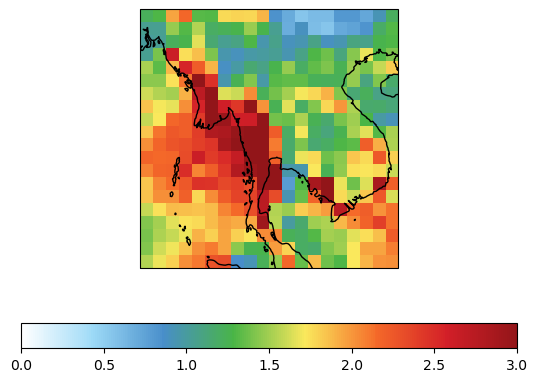

In [15]:
monthly = load_7month(filename='may_first_start_2017_2022_7months_51ensembles')
thailand = extract_thailand(monthly)
sixmonth = thailand[0, 0, 5, :, :]
draw_thailand(sixmonth)

In [57]:
def draw_ensemble(data,
                  start=2017,
                  end=2022,
                  ensembles=51
                  ):
    rep1 = np.mean(data, axis=2)
    rep2 = np.mean(rep1, axis=2)
    means = np.mean(rep2, axis=0)
    stds = np.std(rep2, axis=0)
    print(rep2.shape, means.shape, stds.shape)
    
    plt.figure(figsize=(6, 10))
    x = np.arange(start, end+1)
    
    for e in range(ensembles):
        if e == ensembles-1:
            plt.plot(
                     x,
                     rep2[e, :],
                     marker='X',
                     markersize=3,
                     c='b',
                     linestyle='None',
                     label='ensemble individuals',
                     )
        else:
            plt.plot(
                     x,
                     rep2[e, :],
                     marker='X',
                     markersize=3,
                     c='b',
                     linestyle='None',
                     )
    
    plt.rcParams["font.size"] = 18
    plt.plot(x,
             means,
             marker='o',
             markersize=7,
             label='Ensemble Mean',
            )
    plt.fill_between(x,
                     means - stds,
                     means + stds,
                     alpha=.1,
                     label='std',
                    )
    plt.ylabel('total rainfall May-October (m)')
    plt.legend()
    plt.tight_layout()

(51, 6) (6,) (6,)


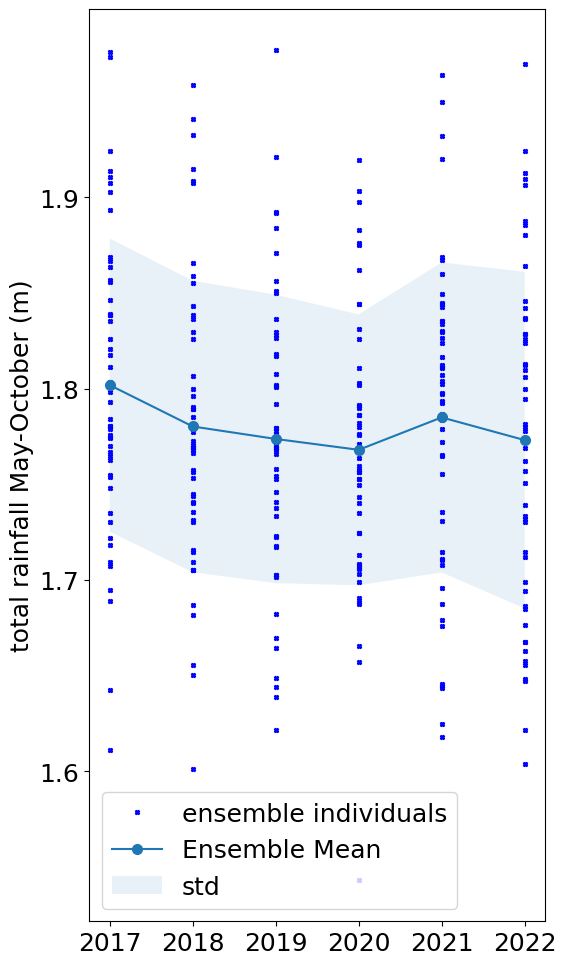

In [58]:
draw_ensemble(thailand[:, :, 5, :, :])